In [1]:
import cv2
import numpy
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
path = r"D:\pd dataset"
INPSIZE = (200,200)

In [3]:
x = []
y = []

In [4]:
npath = os.path.join(path,"nm")

for i in tqdm(os.listdir(npath)):
    y.append(0)
    img = cv2.cvtColor(cv2.imread(os.path.join(npath,i)),cv2.COLOR_BGR2GRAY)/255
    img = img[round(img.shape[0]*.25):round(img.shape[0]*.65), round(img.shape[1]*.30):round(img.shape[1]*.70)]
    img = cv2.resize(img,INPSIZE)
    x.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:38<00:00,  5.20it/s]


In [5]:
npath = os.path.join(path,"pd")

for i in tqdm(os.listdir(npath)):
    y.append(1)
    img = cv2.cvtColor(cv2.imread(os.path.join(npath,i)),cv2.COLOR_BGR2GRAY)/255
    img = img[round(img.shape[0]*.25):round(img.shape[0]*.65), round(img.shape[1]*.30):round(img.shape[1]*.70)]
    img = cv2.resize(img,INPSIZE)
    x.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:39<00:00,  5.12it/s]


In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x.shape, y.shape

((400, 200, 200), (400,))

In [8]:
i = 300

1


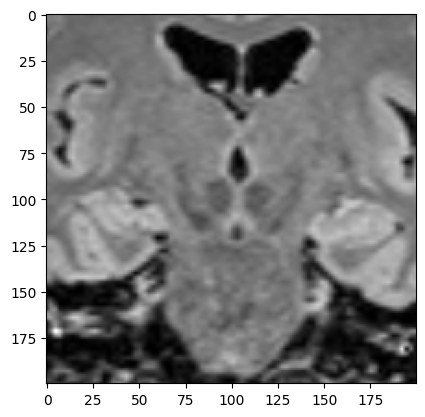

In [10]:
plt.imshow(x[i],cmap="gray")
print(y[i])
i+=1

In [11]:
p = np.random.permutation(y.shape[0])

In [12]:
x = x[p]
y = y[p]

In [14]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [15]:
model = Sequential([
    Conv2D(8,(3,3), activation = "leaky_relu", input_shape=INPSIZE+(1,)),
    MaxPooling2D(),
    
    Conv2D(32,(3,3), activation = "leaky_relu"),
    MaxPooling2D(),
    
    Conv2D(64,(3,3), activation = "leaky_relu"),
    MaxPooling2D(),
    
    Conv2D(256,(3,3), activation = "leaky_relu"),
    MaxPooling2D(),
    
    Flatten(),
    
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)       

In [16]:
model.compile(optimizer=tf.optimizers.Adam(1e-4), loss=tf.losses.binary_crossentropy, metrics=["acc"])

In [17]:
hist = model.fit(x,y,epochs=20, validation_split=.2)

Epoch 1/20


10/10 [==============================] - 17s 696ms/step - loss: 0.6953 - acc: 0.4969 - val_loss: 0.6924 - val_acc: 0.6125
Epoch 2/20
10/10 [==============================] - 4s 421ms/step - loss: 0.6914 - acc: 0.5719 - val_loss: 0.6913 - val_acc: 0.6250
Epoch 3/20
10/10 [==============================] - 6s 558ms/step - loss: 0.6888 - acc: 0.5781 - val_loss: 0.6888 - val_acc: 0.7000
Epoch 4/20
10/10 [==============================] - 6s 604ms/step - loss: 0.6828 - acc: 0.7781 - val_loss: 0.6848 - val_acc: 0.5125
Epoch 5/20
10/10 [==============================] - 6s 556ms/step - loss: 0.6756 - acc: 0.6719 - val_loss: 0.6787 - val_acc: 0.6625
Epoch 6/20
10/10 [==============================] - 4s 448ms/step - loss: 0.6621 - acc: 0.7406 - val_loss: 0.6709 - val_acc: 0.6875
Epoch 7/20
10/10 [==============================] - 4s 451ms/step - loss: 0.6393 - acc: 0.8594 - val_loss: 0.6537 - val_acc: 0.6750
Epoch 8/20
10/10 [==============================] - 4s 416ms/step - loss:

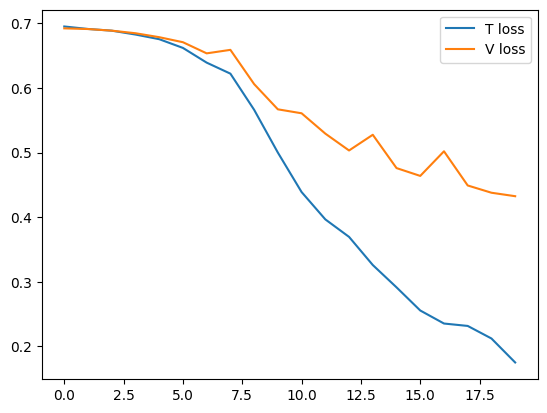

In [18]:
plt.plot(hist.history["loss"], label="T loss")
plt.plot(hist.history["val_loss"], label="V loss")
plt.legend()
plt.show()

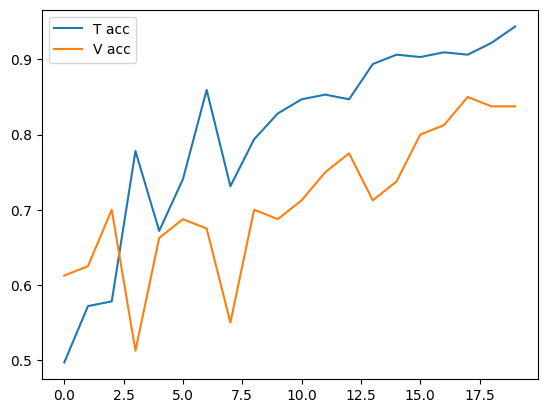

In [19]:
plt.plot(hist.history["acc"], label="T acc")
plt.plot(hist.history["val_acc"], label="V acc")
plt.legend()
plt.show()

In [ ]:
i = 0

0
1/1 [==============================] - 0s 46ms/step
0


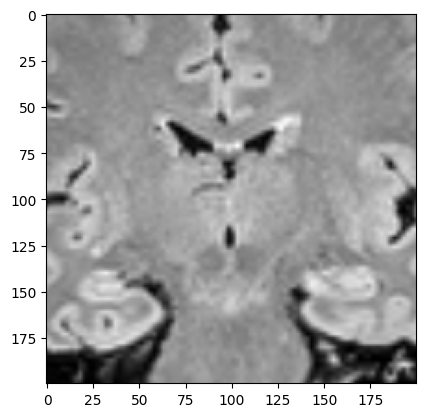

In [31]:
plt.imshow(x[i], cmap="gray")
print(y[i])
print(round(model.predict(np.array([x[i]]))[0,0]))
i += 1

In [22]:
model.save(r"C:\cllg\nural networks\Parkinsons\models\pd_95val.h5")

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
